# Self-Balancing Scooter Control

![](images/self-balancing-scooter.png)

> A self-balancing scooter [...] is a self-balancing personal transporter consisting of two motorized wheels connected to a pair of articulated pads on which the rider places their feet. The rider controls the speed by leaning forward or backward, and direction of travel by twisting the pads.
> 
> Source: <https://en.wikipedia.org/wiki/Self-balancing_scooter>

### Python Dependencies

In [1]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *

Step 1 - Scooter Planar Model
================================

### Introduction

We consider a simple model of a self-balancing scooter evolving in the plane. It is mainly made of

  - The frame that contains the two articulated pads; from above, each pad essentially look like a triangle (one vertice in the center of the frame, one vertice at each extremity of the wheel).

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the frame. 
    
Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the scooter faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the scooter moves forward.

### Parameter Definition

From now on, we assume that the seat frame length is $\ell = 50 \mbox{ cm}$ and the wheel radius is $r = 12.5 \mbox{ cm}$.

🧩 Define the corresponding Python variables `l` and `r` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [ ]:
l=0.5
r=0.125

### Graphical Representation

🧩 Implement a function `draw_scooter` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with a red frame and black fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. Use a green circle marker 50 cm in of the frame to indicate which way is forward.

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

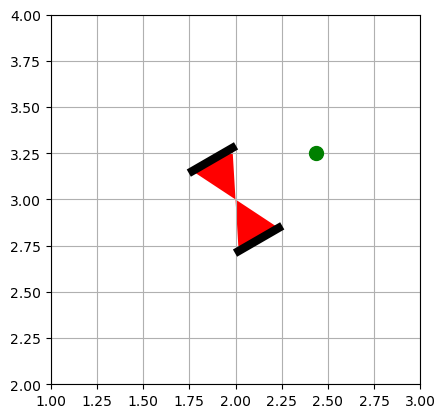

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def draw_scooter(x, y, theta1):
    # Define the frame of the scooter (length) and wheel radius
    frame_length = 0.5  # 50 cm
    wheel_radius = 0.125  # 12.5 cm
    
    # Define the shape of the pads as isosceles triangles
    pad_width = 0.5  # Width of the pad at the base
    theta = np.pi/2 - theta1
    # Pad vertices: base vertices at the wheel positions and the top vertex at the center
    pad_left = np.array([
        [-frame_length / 2, -wheel_radius],
        [-frame_length / 2, wheel_radius],
        [0, 0]
    ])
    
    pad_right = np.array([
        [frame_length / 2, -wheel_radius],
        [frame_length / 2, wheel_radius],
        [0, 0]
    ])
    
    # Define the wheels positions (fixed at the ends of the frame)
    wheels = np.array([
        [-frame_length / 2, -wheel_radius],
        [-frame_length / 2, wheel_radius],
        [frame_length / 2, -wheel_radius],
        [frame_length / 2, wheel_radius]
    ])
    
    # Compute the position of the center of the wheelchair
    wheelchair_center = [x, y]
    
    # Define the forward marker position (aligned with the center of the wheelchair)
    forward_marker = [x, y + 0.5]
    
    # Rotation matrix for angle theta
    R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    
    # Rotate and translate the pads, wheels and marker
    pad_left = np.dot(pad_left, R) + wheelchair_center
    pad_right = np.dot(pad_right, R) + wheelchair_center
    wheels = np.dot(wheels, R) + wheelchair_center
    forward_marker = [x + 0.5*cos(theta1), y + 0.5*sin(theta1)]
    
    # Plot the pads
    plt.fill(pad_left[:, 0], pad_left[:, 1], 'r')
    plt.fill(pad_right[:, 0], pad_right[:, 1], 'r')
    
    # Plot the wheels
    plt.plot(wheels[0:2, 0], wheels[0:2, 1], 'k', linewidth=6)
    plt.plot(wheels[2:4, 0], wheels[2:4, 1], 'k', linewidth=6)
    
    # Plot the forward marker
    plt.plot(forward_marker[0], forward_marker[1], 'go', markersize=10)
    
    # Set the aspect ratio to equal and set the limits
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(x - 1, x + 1)
    plt.ylim(y - 1, y + 1)
    
    # Show the plot
    plt.grid(True)
    plt.show()

# Example usage
draw_scooter(2, 3, np.pi/6)  # Position (0,0) and 45 degrees rotation

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [9]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

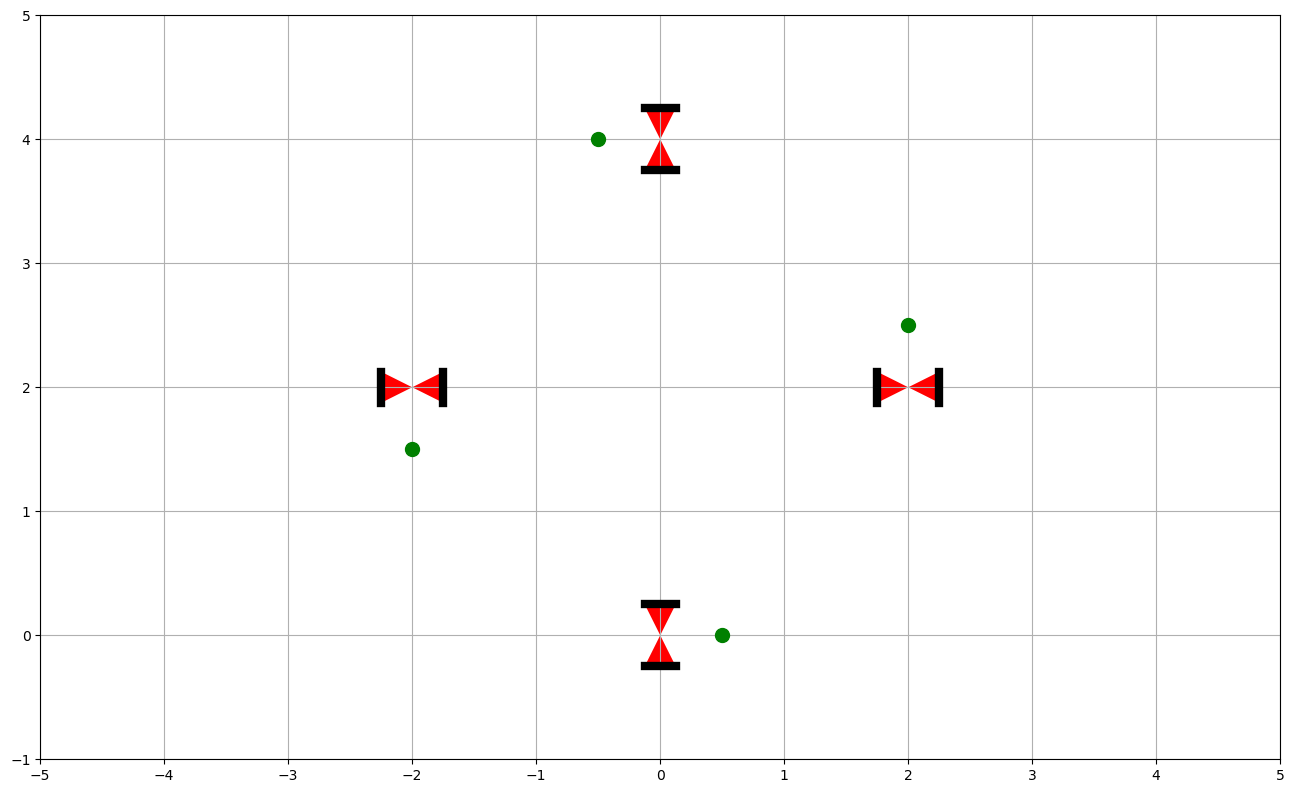

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the draw_arena function
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    plt.figure(figsize=figsize)
    axes = plt.gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    plt.xticks(np.arange(xmin, xmax+1, 1))
    plt.yticks(np.arange(ymin, ymax+1, 1))
    plt.grid(True)

# Define the draw_scooter function
def draw_scooter(x, y, theta1):
    frame_length = 0.5  # 50 cm
    wheel_radius = 0.125  # 12.5 cm
    pad_width = 0.5
    
    theta = np.pi/2 - theta1
    
    pad_left = np.array([
        [-frame_length / 2, -wheel_radius],
        [-frame_length / 2, wheel_radius],
        [0, 0]
    ])
    
    pad_right = np.array([
        [frame_length / 2, -wheel_radius],
        [frame_length / 2, wheel_radius],
        [0, 0]
    ])
    
    wheels = np.array([
        [-frame_length / 2, -wheel_radius],
        [-frame_length / 2, wheel_radius],
        [frame_length / 2, -wheel_radius],
        [frame_length / 2, wheel_radius]
    ])
    
    wheelchair_center = [x, y]
    forward_marker = [x + 0.5 * np.cos(theta1), y + 0.5 * np.sin(theta1)]
    
    R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    
    pad_left = np.dot(pad_left, R) + wheelchair_center
    pad_right = np.dot(pad_right, R) + wheelchair_center
    wheels = np.dot(wheels, R) + wheelchair_center
    
    plt.fill(pad_left[:, 0], pad_left[:, 1], 'r')
    plt.fill(pad_right[:, 0], pad_right[:, 1], 'r')
    plt.plot(wheels[0:2, 0], wheels[0:2, 1], 'k', linewidth=6)
    plt.plot(wheels[2:4, 0], wheels[2:4, 1], 'k', linewidth=6)
    plt.plot(forward_marker[0], forward_marker[1], 'go', markersize=10)

# Call draw_arena function to set up the plot
draw_arena(-5, 5, -5, 5)

# Call draw_scooter function for each position and orientation
positions = [(0, 0, 0), (2, 2, np.pi/2), (0, 4, np.pi), (-2, 2, 3*np.pi/2)]
for pos in positions:
    draw_scooter(*pos)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-5, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.show()

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

$\dot{x}$=r/l($\omega_r$+$\omega_l$)Cos($\theta$)

$\dot{y}$=r/l($\omega_r$+$\omega_l$)Sin($\theta$)

$\dot{\theta}$=r/l($\omega_r$-$\omega_l$)

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**TODO**

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [ ]:
def omega(t, xytheta):
    omega_l = (1 - l/4) * pi / r
    omega_r = (1 + l/4) * pi / r
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [ ]:
pass

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - \ell/4)  \pi / r \mbox{ rad/s}$ and $\omega_r = (1 + \ell/4)  \pi / r \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [ ]:
pass

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

In [ ]:
pass

🧩 Use the simulation results to display the robot location every 0.5 second.

In [ ]:
pass

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**TODO**

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

In [ ]:
pass

🧩 If needed, adjust the simulation parameters the simulated position error is less than $1\, \mathrm{ mm}$. 

In [ ]:
pass